#Set up

In [ ]:
#Import important libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

#Get data

In [ ]:
#Download data
dataset = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv')

In [ ]:
#Dataset visualization
dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#Loading the data
Use only the following columns:
> * 'neighbourhood_group',
* 'room_type',
* 'latitude',
* 'longitude',
* 'minimum_nights',
* 'number_of_reviews',
* 'reviews_per_month',
* 'calculated_host_listings_count',
* 'availability_365',
* 'price'

* Fill NAs with 0
* Apply the log tranform to price
* Do train/validation/test split with 60%/20%/20% distribution.
* Use the train_test_split function and set the random_state parameter to 1
* Use DictVectorizer to turn the dataframe into matrices


In [ ]:
#Use only the following columns:
important_columns = ['neighbourhood_group','room_type','latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month',
                     'calculated_host_listings_count','availability_365','price']
dataset = dataset[important_columns]

In [ ]:
#Fill NAs with 0
dataset.isnull().sum()

neighbourhood_group                   0
room_type                             0
latitude                              0
longitude                             0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
price                                 0
dtype: int64

In [ ]:
#Filling missing data 
dataset['reviews_per_month'] = dataset['reviews_per_month'].fillna(value = 0)

In [ ]:
#Checking that there are no more missing data 
dataset.isnull().sum()

neighbourhood_group               0
room_type                         0
latitude                          0
longitude                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
price                             0
dtype: int64

In [ ]:
#Apply the log tranform to price
dataset['price'] = np.log1p(dataset['price'])

In [ ]:
#Split data into X and Y variables 
X = dataset.iloc[:, :-1]
y = dataset.iloc[:,-1].values

In [ ]:
#Do train/validation/test split with 60%/20%/20% distribution.
#Use the train_test_split function and set the random_state parameter to 1
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state =1, test_size = 0.40)
X_test,X_validation,y_test,y_validation = train_test_split(X_test,y_test, random_state = 1, test_size = 0.50)

In [ ]:
#Use DictVectorizer to turn the dataframe into matrices
X_train = X_train.to_dict(orient = 'records')
X_validation = X_validation.to_dict(orient = 'records')

from sklearn.feature_extraction import DictVectorizer
vectorizer = DictVectorizer(sparse=False)

X_train = vectorizer.fit_transform(X_train)
X_validation = vectorizer.fit_transform(X_validation)

#Question 1
Let's train a decision tree regressor to predict the price 
 variable.

* Train a model with max_depth=1

Which feature is used for splitting the data?

* room_type
* neighbourhood_group
* number_of_reviews
* reviews_per_month

In [ ]:
#Trian a Decision tree regressor
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth = 1 )
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [ ]:
#visualizing Which feature is used for splitting the data
from sklearn.tree import export_text
print(export_text(model, feature_names = vectorizer.get_feature_names()))

|--- room_type=Entire home/apt <= 0.50
|   |--- value: [4.29]
|--- room_type=Entire home/apt >  0.50
|   |--- value: [5.15]



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Which feature is used for splitting the data?

room_type

# Question 2
Train a random forest model with these parameters:

* n_estimators=10
* random_state=1
* n_jobs=-1 (optional - to make training faster)

What's the RMSE of this model on validation?

* 0.059
* 0.259
* 0.459
* 0.659

In [ ]:
#Train a random forest model with these parameters: n_estimators=10, random_state=1, n_jobs=-1 (optional - to make training faster)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [ ]:
#Making prediction
y_pred = model.predict(X_validation)

In [ ]:
#Calculating the mean_squared_error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_validation, y_pred)

0.21546533333309423

# Question 3
Now let's experiment with the n_estimators parameter

* Try different values of this parameter from 10 to 200 with step 10
* Set random_state to 1
* Evaluate the model on the validation dataset

After which value of n_estimators does RMSE stop improving?

* 10
* 50
* 70
* 120

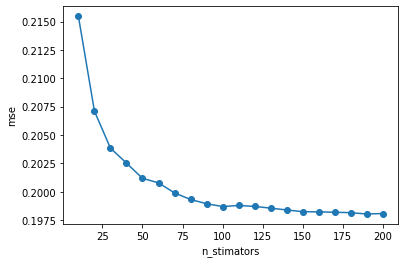

In [ ]:
#Trainig a random forest model with diferent values for n_stimators parameter
n_estimators = [ ]
mse_list = [ ]
for i in range(1,21):
  model = RandomForestRegressor(n_estimators=i*10, random_state=1, n_jobs=-1)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_validation)
  mse = mean_squared_error(y_validation, y_pred)
  mse_list.append(mse)
  n_estimators.append(i*10)
  

plt.scatter(n_estimators, mse_list)
plt.plot(n_estimators, mse_list)
plt.xlabel('n_stimators')
plt.ylabel('mse')
plt.show()

#Question 4

Let's select the best max_depth:

* Try different values of max_depth: [10, 15, 20, 25]
* For each of these values, try different values of n_estimators from 10 till 200 (with step 10)
* Fix the random seed: random_state=1

What's the best max_depth:

* 10
* 15
* 20
* 25

Bonus question (not graded):

Will the answer be different if we change the seed for the model?

In [ ]:
#Traing a RandomForestRegressor model with diferent values for max_depth and n_estimators parameters 
max_depth = [10, 15, 20, 25]
mse_list = [ ]

for depth in max_depth:
  for i in range(1, 21):
    model = RandomForestRegressor(n_estimators=i*10, random_state=1, n_jobs=-1, max_depth = depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_validation)
    mse = mean_squared_error(y_validation, y_pred)
    mse_list.append(mse)
    print('depth: ', depth, '  n_estimators: ', i*10, '  mse: ', mse)


depth:  10   n_estimators:  10   mse:  0.2012038017412851
depth:  10   n_estimators:  20   mse:  0.1990845361231081
depth:  10   n_estimators:  30   mse:  0.19845556802590153
depth:  10   n_estimators:  40   mse:  0.19825684052084583
depth:  10   n_estimators:  50   mse:  0.1978565957543545
depth:  10   n_estimators:  60   mse:  0.1975173301898624
depth:  10   n_estimators:  70   mse:  0.19741551145909073
depth:  10   n_estimators:  80   mse:  0.19724930324353313
depth:  10   n_estimators:  90   mse:  0.19711769989406888
depth:  10   n_estimators:  100   mse:  0.19710089976491793
depth:  10   n_estimators:  110   mse:  0.19722504937267218
depth:  10   n_estimators:  120   mse:  0.1971923189549966
depth:  10   n_estimators:  130   mse:  0.1971661188832679
depth:  10   n_estimators:  140   mse:  0.19708984991758974
depth:  10   n_estimators:  150   mse:  0.19703155888459026
depth:  10   n_estimators:  160   mse:  0.19708244794704244
depth:  10   n_estimators:  170   mse:  0.1970616093698

# Question 5

We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorith, it finds the best split. When doint it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the imporatant features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:

* Train the model with these parametes:
> * n_estimators=10,
> * max_depth=20,
> * random_state=1,
> * n_jobs=-1 (optional)

* Get the feature importance information from this model

What's the most important feature?

* neighbourhood_group=Manhattan
* room_type=Entire home/apt
* longitude
* latitude

In [ ]:
#Training a random forest model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
model.fit(X_train, y_train)

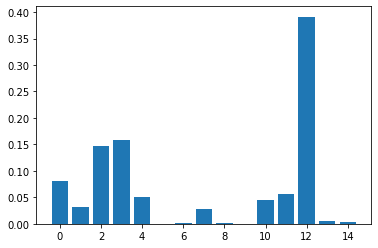

In [ ]:
#Important features plot visualization
importance = model.feature_importances_
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
#Important features dataframe visualization
df_importances = pd.DataFrame()
df_importances['features'] = vectorizer.get_feature_names()
df_importances['importance'] = model.feature_importances_
df_importances

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,features,importance
0,availability_365,0.080960
1,calculated_host_listings_count,0.032539
2,latitude,0.146491
3,longitude,0.158491
4,minimum_nights,0.050223
5,neighbourhood_group=Bronx,0.000319
6,neighbourhood_group=Brooklyn,0.001218
7,neighbourhood_group=Manhattan,0.028573
8,neighbourhood_group=Queens,0.001409
9,neighbourhood_group=Staten Island,0.000054


What's the most important feature?


room_type=Entire home/apt

# Question 6
Now let's train an XGBoost model! For this question, we'll tune the eta parameter

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:


 xgb_params = { 'eta': 0.3, 'max_depth': 6, 'min_child_weight': 1, 'objective': 'reg:squarederror','nthread': 8,'seed': 1,'verbosity': 1}


Now change eta first to 0.1 and then to 0.01

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* 0.01

In [ ]:
# Install XGBoost
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb 

In [ ]:
#Create DMatrix for train and validation sets
features = vectorizer.get_feature_names()
X_train = xgb.DMatrix(X_train, label=y_train, feature_names=features)
X_validation = xgb.DMatrix(X_validation, label=y_validation, feature_names=features)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Create a watchlist
watchlist = [(X_train, 'train'), (X_validation, 'val')]

In [ ]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [ ]:
# Train a model with these parameters for 100 rounds:

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
model_0_3 = xgb.train(xgb_params, X_train, num_boost_round=100,
                  verbose_eval=5, evals=watchlist)

[0]	train-rmse:3.02647	val-rmse:3.02174
[5]	train-rmse:0.674114	val-rmse:0.67634
[10]	train-rmse:0.438268	val-rmse:0.454656
[15]	train-rmse:0.421763	val-rmse:0.44444
[20]	train-rmse:0.413337	val-rmse:0.441905
[25]	train-rmse:0.409284	val-rmse:0.440864
[30]	train-rmse:0.404422	val-rmse:0.440131
[35]	train-rmse:0.400893	val-rmse:0.439744
[40]	train-rmse:0.39717	val-rmse:0.439863
[45]	train-rmse:0.394687	val-rmse:0.440272
[50]	train-rmse:0.390233	val-rmse:0.440331
[55]	train-rmse:0.388507	val-rmse:0.440128
[60]	train-rmse:0.384808	val-rmse:0.440549
[65]	train-rmse:0.382998	val-rmse:0.440445
[70]	train-rmse:0.379886	val-rmse:0.440505
[75]	train-rmse:0.377552	val-rmse:0.440336
[80]	train-rmse:0.37384	val-rmse:0.440134
[85]	train-rmse:0.370992	val-rmse:0.440165
[90]	train-rmse:0.369273	val-rmse:0.440308
[95]	train-rmse:0.367247	val-rmse:0.440379
[99]	train-rmse:0.366025	val-rmse:0.440316


In [ ]:
# Now change eta first to 0.1 and then to 0.01
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
model_0_1 = xgb.train(xgb_params, X_train, num_boost_round=100,
                  verbose_eval=5, evals=watchlist)

[0]	train-rmse:3.87085	val-rmse:3.86639
[5]	train-rmse:2.31811	val-rmse:2.31368
[10]	train-rmse:1.41841	val-rmse:1.4147
[15]	train-rmse:0.912367	val-rmse:0.911668
[20]	train-rmse:0.644728	val-rmse:0.648153
[25]	train-rmse:0.517006	val-rmse:0.524955
[30]	train-rmse:0.461337	val-rmse:0.473395
[35]	train-rmse:0.438234	val-rmse:0.453695
[40]	train-rmse:0.427887	val-rmse:0.446075
[45]	train-rmse:0.422498	val-rmse:0.442805
[50]	train-rmse:0.418833	val-rmse:0.441143
[55]	train-rmse:0.415854	val-rmse:0.440215
[60]	train-rmse:0.413441	val-rmse:0.439631
[65]	train-rmse:0.411181	val-rmse:0.439303
[70]	train-rmse:0.409494	val-rmse:0.439053
[75]	train-rmse:0.408267	val-rmse:0.438812
[80]	train-rmse:0.40635	val-rmse:0.438606
[85]	train-rmse:0.405202	val-rmse:0.438476
[90]	train-rmse:0.403818	val-rmse:0.438218
[95]	train-rmse:0.402823	val-rmse:0.438195
[99]	train-rmse:0.401521	val-rmse:0.438145


In [ ]:

xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
model_0_0_1 = xgb.train(xgb_params, X_train, num_boost_round=100,
                  verbose_eval=5, evals=watchlist)

[0]	train-rmse:4.2519	val-rmse:4.24758
[5]	train-rmse:4.0464	val-rmse:4.04202
[10]	train-rmse:3.85109	val-rmse:3.84669
[15]	train-rmse:3.66548	val-rmse:3.66107
[20]	train-rmse:3.48909	val-rmse:3.48467
[25]	train-rmse:3.32149	val-rmse:3.31703
[30]	train-rmse:3.16222	val-rmse:3.15774
[35]	train-rmse:3.01091	val-rmse:3.00643
[40]	train-rmse:2.86716	val-rmse:2.86267
[45]	train-rmse:2.73061	val-rmse:2.72614
[50]	train-rmse:2.60093	val-rmse:2.59646
[55]	train-rmse:2.47776	val-rmse:2.47334
[60]	train-rmse:2.36082	val-rmse:2.35641
[65]	train-rmse:2.24979	val-rmse:2.24541
[70]	train-rmse:2.1444	val-rmse:2.14007
[75]	train-rmse:2.04437	val-rmse:2.04013
[80]	train-rmse:1.94947	val-rmse:1.9453
[85]	train-rmse:1.85944	val-rmse:1.85535
[90]	train-rmse:1.77406	val-rmse:1.7701
[95]	train-rmse:1.6931	val-rmse:1.68924
[99]	train-rmse:1.63137	val-rmse:1.62762


Which eta leads to the best RMSE score on the validation dataset?

0.1